## Analysis for Surprise Housing to enter Australian market

Company wants to make profits by purchasing houses at lower prices and sell at a higher price.

`Dataset:` sale of houses in Australia of period 2006-2010

`Target variable:` SalePrice      

`Aim` Explainability of model is important, hence Linear regression is performed with regularization techniques.

In [1280]:
#import all common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

#### Load data

In [1281]:
housing_sales_data = pd.read_csv('train.csv', index_col='Id')

In [1282]:
housing_sales_data.shape

(1460, 80)

In [1283]:
housing_sales_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1284]:
housing_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1285]:
housing_sales_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1286]:
housing_sales_data[~housing_sales_data.PoolQC.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [1287]:
# Data availability is < 1%. We do not have enough data of PoolQc, hence drop it.
housing_sales_data.drop(['PoolQC'], axis=1, inplace=True)

#### Sanity check

In [1288]:
# check if there exists any column with all Nan
housing_sales_data.columns[housing_sales_data.isna().all()]

Index([], dtype='object')

In [1289]:
housing_sales_data.shape

(1460, 79)

In [1290]:
# clean the data for safe checks like empty columns and empty rows...
def sanity_clean_data(housing_sales_data):
    #columns with all empty values to be removed
    housing_sales_data.dropna(axis=1, how='all', inplace=True)
    
    #columns with all same values to be removed as they dont provide any insight
    cols_nounique = [i for i in housing_sales_data.columns if housing_sales_data[i].nunique()==1]
    housing_sales_data.drop(columns=cols_nounique, inplace=True, axis=1)
    print(cols_nounique)
    
    #rows with all NAs to be removed
    housing_sales_data.dropna(axis=0,how='all',inplace=True)
    
sanity_clean_data(housing_sales_data)    

[]


In [1291]:
housing_sales_data.shape

(1460, 79)

#### Data Mapping from data dictionary & outlier analysis:

In [1292]:
# MSSubClass is a categorical but input is numberic. let's convert to string
housing_sales_data.MSSubClass = housing_sales_data.MSSubClass.apply(lambda x: str(x))

In [1293]:
housing_sales_data.MSSubClass.describe()

count     1460
unique      15
top         20
freq       536
Name: MSSubClass, dtype: object

<AxesSubplot:>

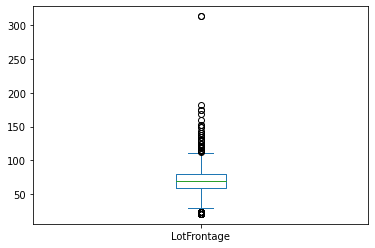

In [1294]:
housing_sales_data.LotFrontage.plot.box()

<AxesSubplot:>

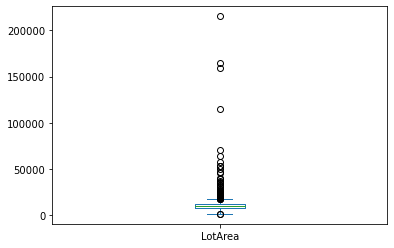

In [1295]:
housing_sales_data.LotArea.plot.box()

In [1296]:
housing_sales_data.shape

(1460, 79)

In [1297]:
# NA for alley have a meaning. so can't be treated as NA. hence replace it with NotApplicable
housing_sales_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [1298]:
housing_sales_data.Alley = housing_sales_data.Alley.fillna(value='NotApplicable')
#same with MiscFeature
housing_sales_data.MiscFeature = housing_sales_data.MiscFeature.fillna(value='NotApplicable')
#same with Fence
housing_sales_data.Fence = housing_sales_data.Fence.fillna(value='NotApplicable')

<AxesSubplot:>

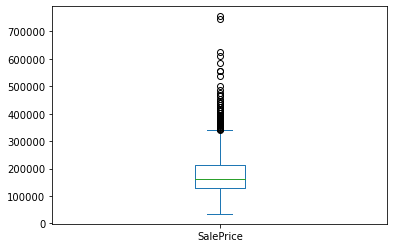

In [1299]:
housing_sales_data.SalePrice.plot.box()

In [1300]:
# MSSubclass is numeric but it should be categorical.
housing_sales_data['MSSubClass'] = housing_sales_data['MSSubClass'].apply(lambda x: str(x))


In [1301]:
housing_sales_data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1302]:
# this is ordered categorical, we can map these to numeric.
housing_sales_data.LotShape = housing_sales_data.LotShape.map({
    "Reg": 4,
    "IR1": 3,
    "IR2": 2,
    "IR3": 1
})

In [1303]:
housing_sales_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1304]:
# we removed some outliers, lets do sanity clean again    
sanity_clean_data(housing_sales_data) 

[]


In [1305]:
housing_sales_data.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [1306]:
# since condition 1, condition 2 are same, we can join them together and get dummies as combined 
housing_sales_data.Condition = housing_sales_data.Condition1 + ',' + housing_sales_data.Condition2
housing_sales_data.Condition.apply(lambda x: str(x))
housing_sales_data.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [1307]:
housing_sales_data.Condition.dtype

dtype('O')

In [1308]:
condition_dummies = housing_sales_data.Condition.str.get_dummies(sep=',').add_prefix('Condition_')
housing_sales_data = pd.concat([housing_sales_data, condition_dummies], axis=1)

In [1309]:
housing_sales_data.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1310]:
#We can have a derived metric for number of floors based on HouseStyle and BldgType which can give almost 90% of data.
# this could be a good derived metric
housing_sales_data['HouseStyleFloorsMap'] = housing_sales_data.HouseStyle.map({
    "1Story": 1,
    "1.5Fin": 1.5,
    "1.5Unf": 1.5,
    "2Story": 2,
    "2.5Fin": 2.5,
    "2.5Unf": 2.5,
    "SFoyer": 0,
    "SLvl":	0
})
housing_sales_data['BldgTypeFloorsMap'] = housing_sales_data.BldgType.map(
    {
    "1Fam": 1,
    "2fmCon": 1.5,	
    "Duplex": 2,
    "Twnhs":3,
    "TwnhsE": 3
    }
)
housing_sales_data['Floors'] = housing_sales_data[['HouseStyleFloorsMap','BldgTypeFloorsMap']].apply(lambda x: x['HouseStyleFloorsMap'] if x['HouseStyleFloorsMap']>0 else x['BldgTypeFloorsMap'], axis=1)


In [1311]:
housing_sales_data.Floors.value_counts()

1.0    806
2.0    455
1.5    169
2.5     19
3.0     11
Name: Floors, dtype: int64

In [1312]:
housing_sales_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'E

<AxesSubplot:ylabel='Frequency'>

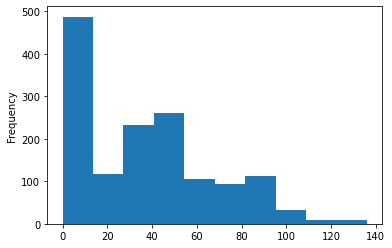

In [1313]:
# We can also derive age of house, age since renovation.
housing_sales_data['Age'] = housing_sales_data.YrSold - housing_sales_data.YearBuilt
housing_sales_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

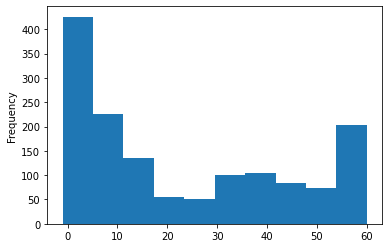

In [1314]:

housing_sales_data['AgeRemod'] = housing_sales_data.YrSold - housing_sales_data.YearRemodAdd
housing_sales_data['AgeRemod'].plot.hist()

In [1315]:
housing_sales_data.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [1316]:
housing_sales_data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [1317]:
#BrkComm and Brk Cmn are same so refactor
# similarly WdSHng and Cment Bd are mistyped
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "BrkComm" if x=='Brk Cmn' else x)
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "WdShing" if x=="Wd Shng" else x)
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "CemntBd" if x=='CmentBd' else x)

# Exterior1st and Exterior2nd must be merged together and then dummies should be created.
housing_sales_data.Exterior = housing_sales_data.Exterior1st + ',' + housing_sales_data.Exterior2nd
housing_sales_data.Exterior.apply(lambda x: str(x).lower())
housing_sales_data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)
exterior_dummies = housing_sales_data.Exterior.str.get_dummies(sep=',').add_prefix('Exterior_')
housing_sales_data = pd.concat([housing_sales_data, exterior_dummies], axis=1)

In [1318]:
housing_sales_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Exterior_HdBoard', 'Exterior_ImStucc', 'Exterior_MetalSd',
       'Exterior_Other', 'Exterior_Plywood', 'Exterior_Stone',
       'Exterior_Stucco', 'Exterior_VinylSd', 'Exterior_Wd Sdng',
       'Exterior_WdShing'],
      dtype='object', length=105)

In [1319]:
#since ExterQual, ExterCond is ordered categorical, we can convert to numeric
# NA -> not applicable -> this happens when feature is not avaiable. hence giving zero weight for NA
ordered_quality_map = {
     "Ex": 5,
     "Gd": 4,
     "TA": 3,
     "Fa": 2,
     "Po": 1,
     "NA": 0
}
housing_sales_data.ExterQual = housing_sales_data.ExterQual.map(ordered_quality_map).fillna(0)
housing_sales_data.ExterCond = housing_sales_data.ExterCond.map(ordered_quality_map).fillna(0)

In [1320]:
housing_sales_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1321]:
#similarly do it for other quality based columns
#BsmtQual, BsmtCond
housing_sales_data.BsmtQual = housing_sales_data.BsmtQual.map(ordered_quality_map).fillna(0)
housing_sales_data.BsmtCond = housing_sales_data.BsmtCond.map(ordered_quality_map).fillna(0)

#HeatingQC
housing_sales_data.HeatingQC = housing_sales_data.HeatingQC.map(ordered_quality_map).fillna(0)

#KitchenQual, FireplaceQu
housing_sales_data.KitchenQual = housing_sales_data.KitchenQual.map(ordered_quality_map).fillna(0)
housing_sales_data.FireplaceQu = housing_sales_data.FireplaceQu.map(ordered_quality_map).fillna(0)

#GarageQual, GarageCond
housing_sales_data.GarageQual = housing_sales_data.GarageQual.map(ordered_quality_map).fillna(0)
housing_sales_data.GarageCond = housing_sales_data.GarageCond.map(ordered_quality_map).fillna(0)


In [1322]:
# BsmtFinType1, BsmtFinType2
bsmt_finished_qual_map = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
}
housing_sales_data.BsmtFinType1 = housing_sales_data.BsmtFinType1.map(bsmt_finished_qual_map).fillna(0)
housing_sales_data.BsmtFinType2 = housing_sales_data.BsmtFinType2.map(bsmt_finished_qual_map).fillna(0)

# Functional: Home functionality (Assume typical unless deductions are warranted)
functional_map = {
    "Typ": 8,
    "Min1":7,
    "Min2":6,
    "Mod": 5,
    "Maj1":4,
    "Maj2":3,
    "Sev": 2,
    "Sal": 1,
}
housing_sales_data.Functional = housing_sales_data.Functional.map(functional_map).fillna(0)

#GarageFinish: Interior finish of the garage
garage_finish_map = {
   "Fin": 3,
   "RFn": 2,
   "Unf": 1,
   "NA": 0
}
housing_sales_data.GarageFinish = housing_sales_data.GarageFinish.map(garage_finish_map).fillna(0)

In [1323]:
colnames_numerics_only = housing_sales_data.select_dtypes(include=np.number).columns.tolist()

In [1324]:
colnames_numerics_only

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [1325]:
colnames_non_numerics_only = housing_sales_data.select_dtypes(include=np.object).columns.tolist()
colnames_non_numerics_only

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1327]:
for colName in colnames_non_numerics_only:
    col_specific_dummies = pd.get_dummies(housing_sales_data[colName],drop_first=True).add_prefix(colName+"_")
    housing_sales_data = pd.concat([housing_sales_data, col_specific_dummies], axis=1)
    housing_sales_data.drop([colName], axis=1, inplace=True)

In [1328]:
housing_sales_data.columns.tolist()

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [1329]:
colnames_numerics_only = housing_sales_data.select_dtypes(include=np.number).columns.tolist()

In [1330]:
colnames_numerics_only

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [1331]:
len(colnames_numerics_only)

207

In [1332]:
housing_sales_data.shape

(1460, 207)

In [1333]:
housing_sales_data[housing_sales_data.columns[housing_sales_data.isna().any()]]

,LotFrontage,MasVnrArea,GarageYrBlt
Id,,,
1,65.0,196.0,2003.0
2,80.0,0.0,1976.0
3,68.0,162.0,2001.0
4,60.0,0.0,1998.0
5,84.0,350.0,2000.0
...,...,...,...
1456,62.0,0.0,1999.0
1457,85.0,119.0,1978.0
1458,66.0,0.0,1941.0


In [1334]:
#LotFrontage, MasVnrArea can be imputed with median and GarageYrBlt with mode
housing_sales_data['LotFrontage'] = housing_sales_data['LotFrontage'].fillna(housing_sales_data['LotFrontage'].median())
housing_sales_data['MasVnrArea'] = housing_sales_data['MasVnrArea'].fillna(housing_sales_data['MasVnrArea'].median())
housing_sales_data['GarageYrBlt'] = housing_sales_data['GarageYrBlt'].fillna(int(housing_sales_data['GarageYrBlt'].mode()))
housing_sales_data.isna().sum().value_counts()

0    207
dtype: int64

## Data pre processing (data scaling)

Since there were some outliers in data, we can use standard scaler

In [1335]:
from sklearn.model_selection import train_test_split

y = housing_sales_data.pop('SalePrice')
X = housing_sales_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1336]:
#Since there were some outliers in data, it's better if we use standard scaler.

from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
scaler = StandardScaler()
# fit transform
X_train = scaler.fit_transform(X_train)
#transform test data
X_test = scaler.transform(X_test)

## Ridge

In [1392]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 450, 500,550, 575, 600,650,675, 700, 800, 900, 1000, 1250, 1500]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 450, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1393]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 550}


In [1394]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 550
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.44618891e+02  2.34610029e+03 -4.94927303e+02  7.66126485e+03
  2.48103112e+03  1.44634608e+03  1.36609793e+03  3.27493348e+03
  3.69481834e+03 -3.03680771e+01  4.19735335e+03 -2.68163322e+02
  2.68882274e+03  2.45551225e+03  3.59331498e+02  2.46281146e+02
  3.36610014e+02  2.95580992e+03  1.26662087e+03  4.40745844e+03
  4.05982206e+03  7.61190042e+02  6.69962030e+03  2.20903151e+03
 -5.47075761e+02  3.66270394e+03  2.02804873e+03  4.46987347e+02
 -1.58164192e+03  4.50736300e+03  5.03524230e+03  1.98028268e+03
  2.87944484e+03  2.67949485e+03  1.30066424e+03  1.27540139e+03
  4.37976938e+03  3.32665932e+03  2.46147889e+02 -7.20820141e+02
  2.14799274e+03  3.65838564e+02  2.42894457e+01  1.33383826e+03
  2.16540497e+03  6.52294703e+02  2.64272958e+02 -2.54229518e+02
  2.33520367e+02 -9.91699386e+02 -2.13370194e+03  1.98507959e+03
 -3.96980766e+02 -1.23280931e+03 -1.32624998e+03  5.18529709e+02
 -1.30579011e+02 -2.02524358e+02  3.45967811e+02 -2.72415684e+03
 -6.40627984e+01 -1.43500

In [1395]:
from sklearn.metrics import mean_squared_error, r2_score

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train:" + str(r2_train_lr))
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test:" + str(r2_test_lr))
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train:" + str(rss1_lr))
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test:" + str(rss2_lr))
metric_ridge.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:" + str(mse_train_lr))
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test:" + str(mse_test_lr))
metric_ridge.append(mse_test_lr**0.5)

R2 train:0.8673924297210196
R2 test:0.8555230445570365
RSS train:881605947608.086
RSS test:369418589193.9409
MSE train:805119586.8566996
MSE test:1012105723.8190162


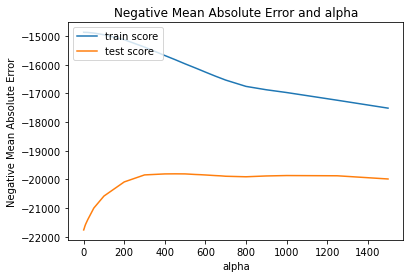

In [1402]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

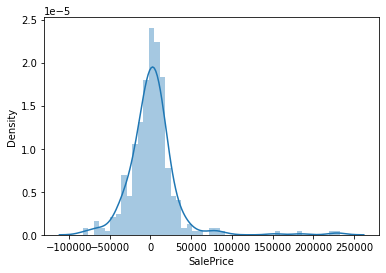

In [1407]:
import seaborn as sns
sns.distplot(residual_test)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

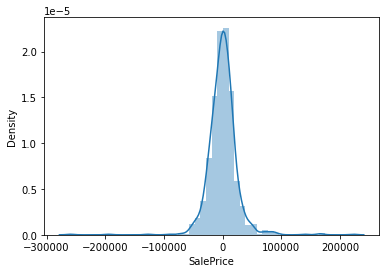

In [1408]:
sns.distplot(residual_train)

## Lasso

In [1397]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 450, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1398]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 450}


In [1399]:
#Fitting Lasso model for alpha = 450 and printing coefficients which have been penalised

alpha =450

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=450)

In [1400]:


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train:" + str(r2_train_lr))
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test:" + str(r2_test_lr))
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train:" + str(rss1_lr))
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test:" + str(rss2_lr))
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:" + str(mse_train_lr))
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test:" + str(mse_test_lr))
metric_lasso.append(mse_test_lr**0.5)

R2 train:0.8941889708833464
R2 test:0.8610612633312303
RSS train:703456313960.9875
RSS test:355257708242.8072
MSE train:642425857.4986187
MSE test:973308789.7063211


In [1364]:
#R2 values for train data is more 

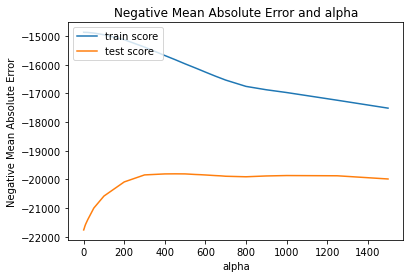

In [1401]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

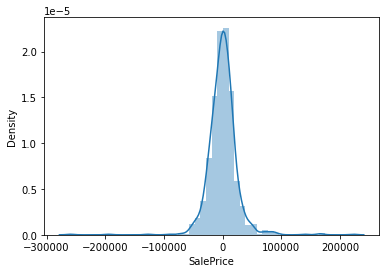

In [1409]:
sns.distplot(residual_train)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

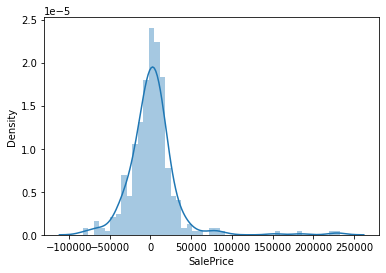

In [1410]:
sns.distplot(residual_test)

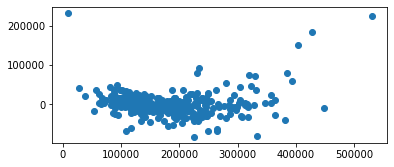

In [1414]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, residual_test)

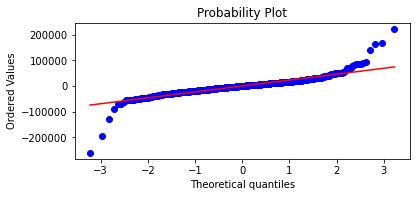

In [1416]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual_train, plot=ax, fit=True)